In [ ]:
import pandas as pd

# Read Data

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/추천시스템 입문/data/movies.csv', index_col = 'movieId')

In [ ]:
movies.shape

(9742, 2)

In [ ]:
#movies.head()
#movies.tail()
movies.sample(10)

,title,genres
movieId,,
34523,The Chumscrubber (2005),Comedy|Drama
48560,Running With Scissors (2006),Comedy|Drama
160271,Central Intelligence (2016),Action|Comedy
148424,Chi-Raq (2015),Comedy|Drama
37380,Doom (2005),Action|Horror|Sci-Fi
7395,Cheaper by the Dozen (1950),Comedy|Drama
167706,Shakespeare Behind Bars (2005),Documentary
1496,Anna Karenina (1997),Drama|Romance
5746,Galaxy of Terror (Quest) (1981),Action|Horror|Mystery|Sci-Fi


In [ ]:
movies.columns

Index(['title', 'genres'], dtype='object')

### 개봉연도 데이터 정제하기

In [ ]:
movies['year'] = movies['title'].str.extract('(\(\d\d\d\d\))') #제목에서 연도추출

In [ ]:
movies['year'] = movies['year'].str.extract('(\d\d\d\d)')# 연도에서 괄호제거

In [ ]:
movies.head()

,title,genres,year
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,Jumanji (1995),Adventure|Children|Fantasy,1995
3,Grumpier Old Men (1995),Comedy|Romance,1995
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
5,Father of the Bride Part II (1995),Comedy,1995


### 결측값 핸들링하기

In [ ]:
movies[movies['year'].isnull()] #결측값 행만 보기

,title,genres,year
movieId,,,
40697,Babylon 5,Sci-Fi,NaN
140956,Ready Player One,Action|Sci-Fi|Thriller,NaN
143410,Hyena Road,(no genres listed),NaN
147250,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),NaN
149334,Nocturnal Animals,Drama|Thriller,NaN
156605,Paterson,(no genres listed),NaN
162414,Moonlight,Drama,NaN
167570,The OA,(no genres listed),NaN
171495,Cosmos,(no genres listed),NaN


In [ ]:
movies['year'] = movies['year'].fillna('2050') #2050으로 일괄적으로 결측값 채움
movies

,title,genres,year
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
2,Jumanji (1995),Adventure|Children|Fantasy,1995
3,Grumpier Old Men (1995),Comedy|Romance,1995
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
193585,Flint (2017),Drama,2017


In [ ]:
### 가장 많이 출현하는 개봉연도를 찾기
movies['year'].value_counts()

2002    311
2006    295
2001    294
2007    284
2000    283
       ... 
1915      1
1921      1
1919      1
1922      1
1908      1
Name: year, Length: 107, dtype: int64

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt #seaborn figure 크기 조절을 위해서

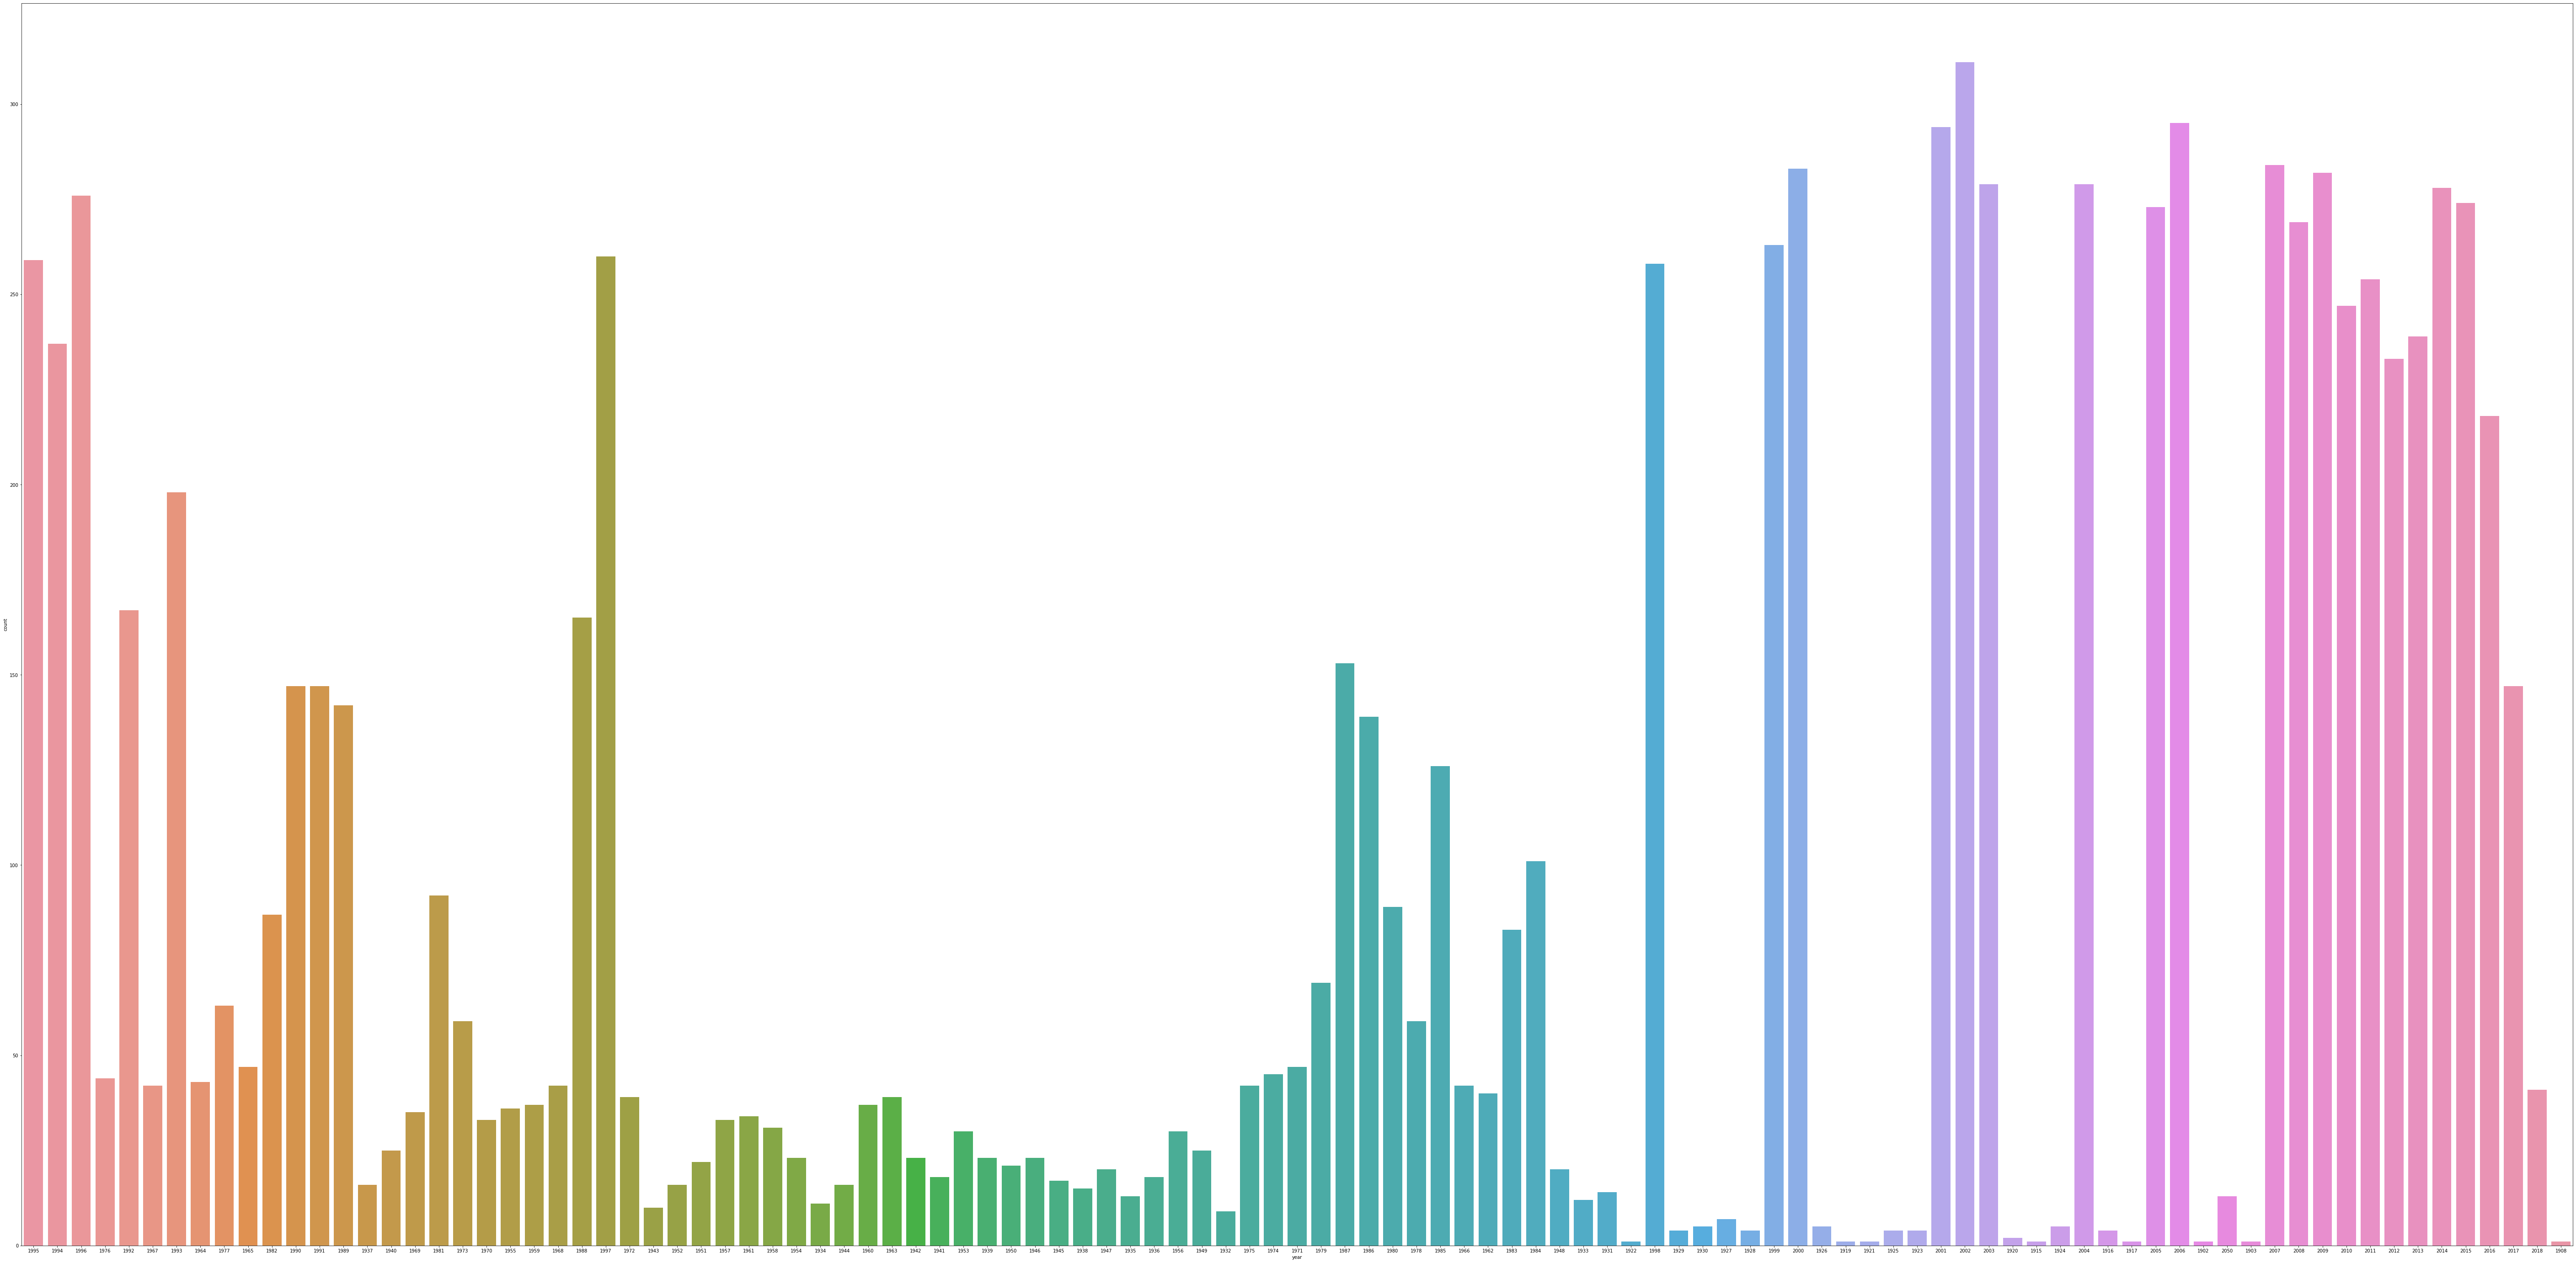

In [ ]:
plt.figure(figsize = (100,50))
sns.countplot(data = movies, x='year')

### genres 분석

In [ ]:
movies['genres']

movieId
1         Adventure|Animation|Children|Comedy|Fantasy
2                          Adventure|Children|Fantasy
3                                      Comedy|Romance
4                                Comedy|Drama|Romance
5                                              Comedy
                             ...                     
193581                Action|Animation|Comedy|Fantasy
193583                       Animation|Comedy|Fantasy
193585                                          Drama
193587                               Action|Animation
193609                                         Comedy
Name: genres, Length: 9742, dtype: object

In [ ]:
sample_genre = movies['genres'][1]
sample_genre

'Adventure|Animation|Children|Comedy|Fantasy'

In [ ]:
sample_genre.split("|")

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']

In [ ]:
genres_list = list(movies['genres'].apply(lambda x:x.split("|"))) #x : movies['genres']
genres_list[:3]

[['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy'],
 ['Adventure', 'Children', 'Fantasy'],
 ['Comedy', 'Romance']]

In [ ]:
flat_list = []
for sublist in genres_list:
  for item in sublist:
    flat_list.append(item) #flat_list에는 모든 레코드의 장르가 담김

In [ ]:
genres_unique = list(set(flat_list)) #중복제거

In [ ]:
len(genres_unique) #총 20개의 장르가 있음

20

### 장르데이터 숫자형으로 변환하기

In [ ]:
movies['Adventure'] = movies['genres'].apply(lambda x:'Adventure' in x)

In [ ]:
movies

,title,genres,year,Adventure
movieId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,True
2,Jumanji (1995),Adventure|Children|Fantasy,1995,True
3,Grumpier Old Men (1995),Comedy|Romance,1995,False
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,False
5,Father of the Bride Part II (1995),Comedy,1995,False
...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017,False
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017,False
193585,Flint (2017),Drama,2017,False


In [ ]:
genres_dummies = movies['genres'].str.get_dummies(sep='|') #영화의 장르 여부를 1과 0으로 구분
genres_dummies

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
193583,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
193585,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#difference between csv and pickle when saving pandas?
genres_dummies.to_pickle('/content/drive/MyDrive/추천시스템 입문/data/ml-latest-small/genres.p')

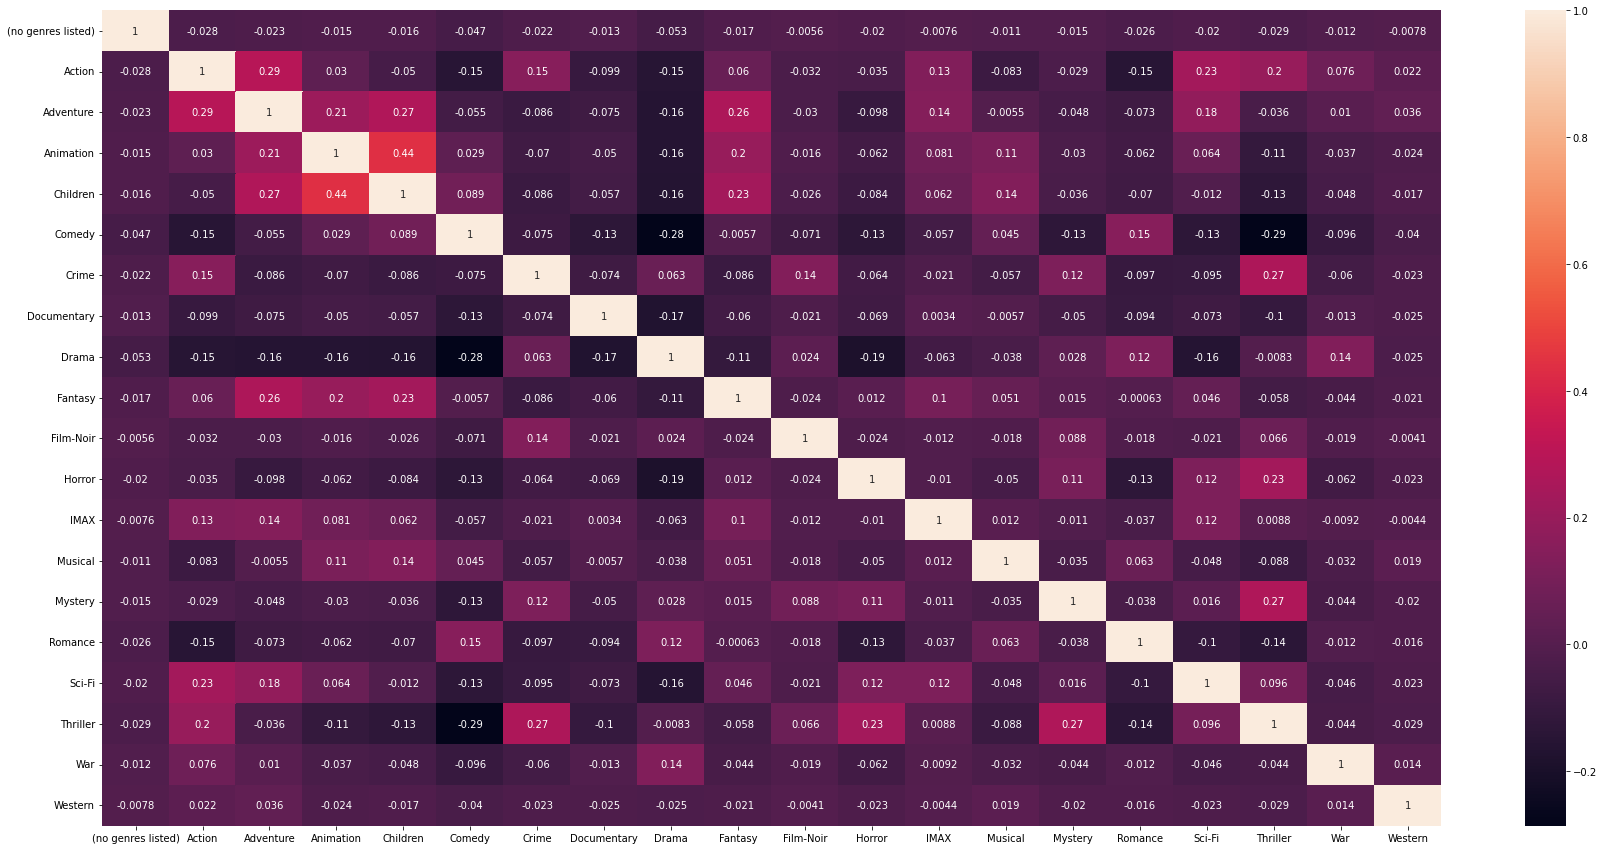

In [ ]:
# 두 장르의 관계가 1에 가깝다는 것은 두 장르가 자주 같이 출현한다는 것
plt.figure(figsize=(30,15))
sns.heatmap(genres_dummies.corr(), annot = True)